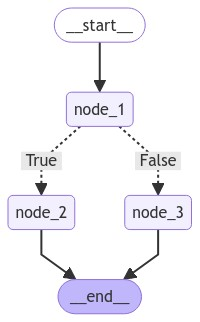

In [109]:
from langgraph.graph import Graph, START, END

def function_1(input):
    return input

def function_2(input):
    return "Node 2"

def function_3(input):
    return "Node 3"

def my_routing_function(input):
    return input == "hello"

graph = Graph()
graph.add_node("node_1", function_1)
graph.add_node("node_2", function_2)
graph.add_node("node_3", function_3)

graph.add_edge(START, "node_1")

graph.add_conditional_edges(
  "node_1", 
  my_routing_function,
  {
    True: "node_2", 
    False: "node_3"
  }
)

graph.add_edge("node_2", END)
graph.add_edge("node_3", END)

app = graph.compile()

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [97]:
app.invoke("hello")

'Node 2'

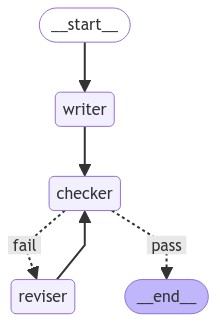

In [108]:
def writer(input):
    return "an essay"

# A fuller solution would use a StateGraph
revisions = 0

def reviser(input):
    global revisions
    revisions = revisions + 1
    print(f"revision number {revisions}")
    return input + " revisions"

def checker(input):
    if revisions >= 3:
        return "good"
    else:
        return "feedback"

def check(input):
    if input == "good":
        return "pass"
    else:
        return "fail"

graph = Graph()
graph.add_node("writer", writer)
graph.add_node("reviser", reviser)
graph.add_node("checker", checker)

graph.add_edge(START, "writer")
graph.add_edge("writer", "checker")
graph.add_edge("reviser", "checker")

graph.add_conditional_edges(
  "checker", 
  check,
  {
    "fail": "reviser", 
    "pass": END
  }
)

app = graph.compile()

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [107]:
app.invoke("write an essay for me")

revision number 1
revision number 2
revision number 3


'good'